In [3]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# Load the dataset
filepath = "/workspaces/AIML316-ADML/Mall_Customers.csv"
df = pd.read_csv(filepath)

# Display initial records and dataset info
print("Head of dataset:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())
print("\nMissing values in each column:")
print(df.isnull().sum())

Head of dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Summary statistics

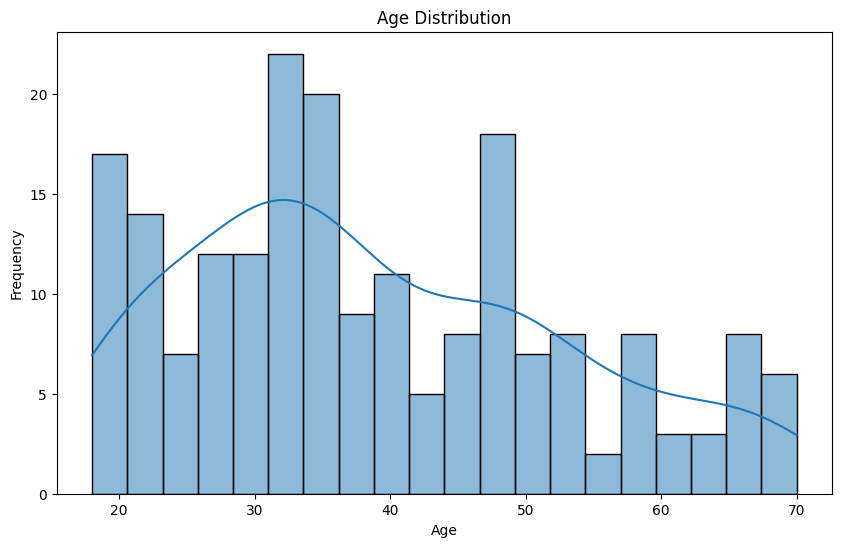

In [5]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

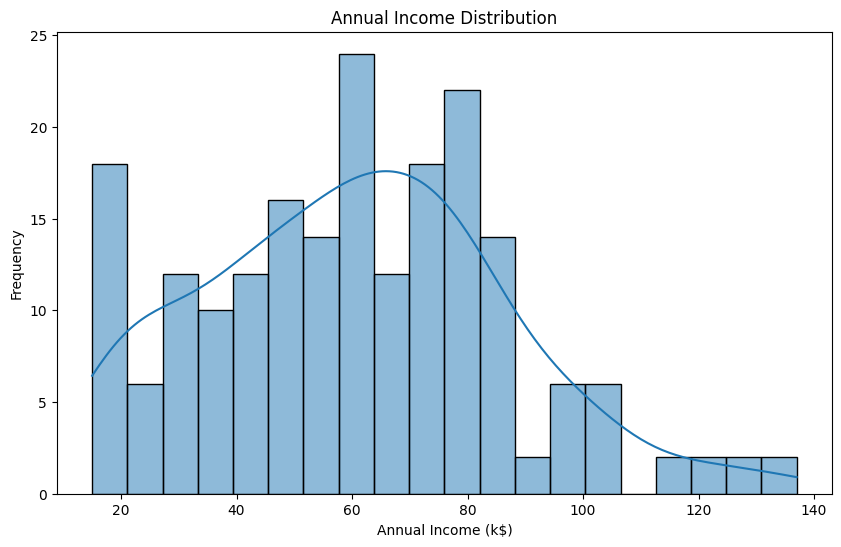

In [6]:
# Distribution of Annual Income
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Frequency")
plt.show()

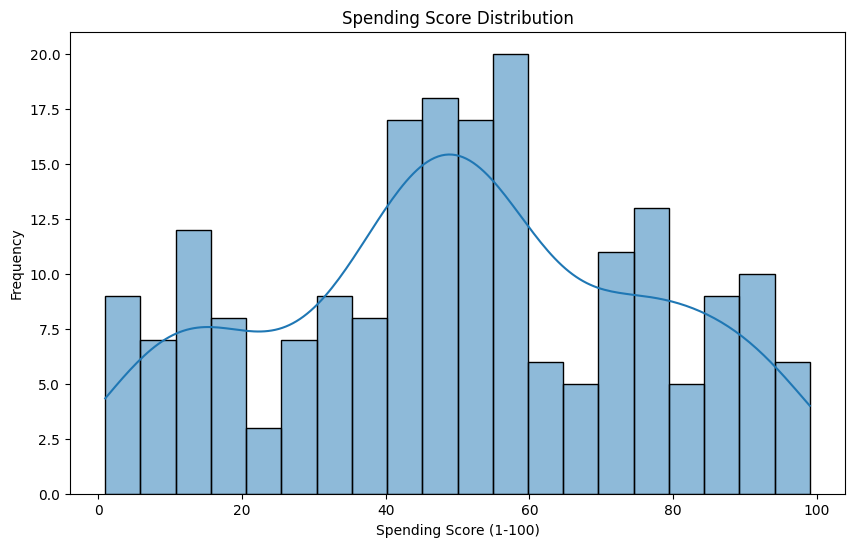

In [7]:
# Distribution of Spending Score
plt.figure(figsize=(10, 6))
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Frequency")
plt.show()

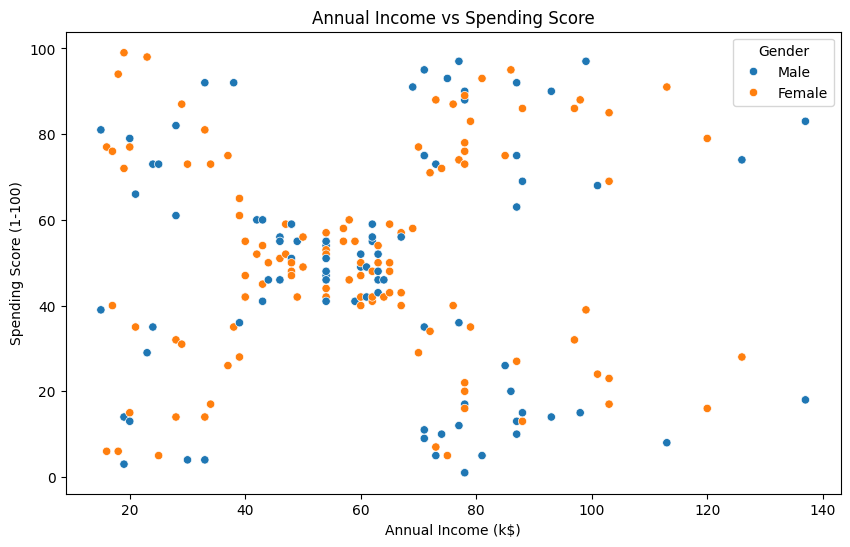

In [8]:
# Scatter plot: Annual Income vs Spending Score, colored by Gender
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Annual Income (k$)", 
                y="Spending Score (1-100)", 
                hue="Gender", 
                data=df)
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

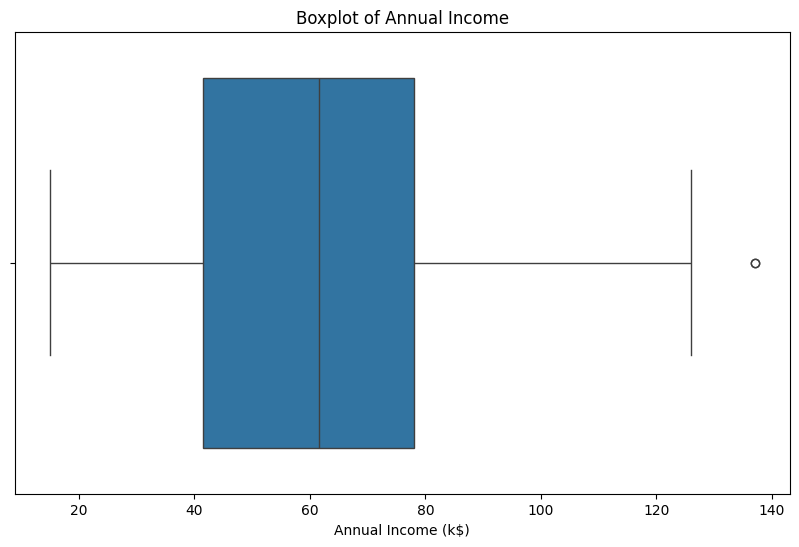

In [9]:
# Boxplot for Annual Income to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Annual Income (k$)"])
plt.title("Boxplot of Annual Income")
plt.xlabel("Annual Income (k$)")
plt.show()


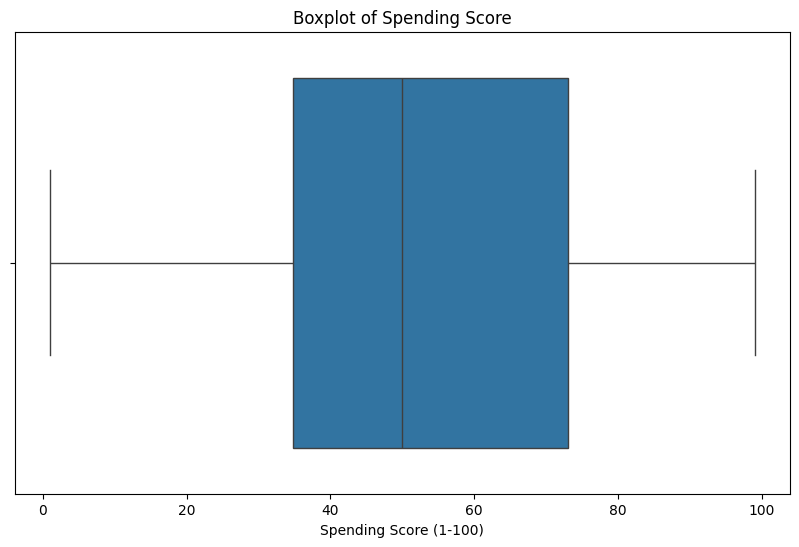

In [10]:
# Boxplot for Spending Score to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Spending Score (1-100)"])
plt.title("Boxplot of Spending Score")
plt.xlabel("Spending Score (1-100)")
plt.show()